In [1]:
import numpy as np
from scipy.linalg import expm
import functions as fn
import helpers as hlp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

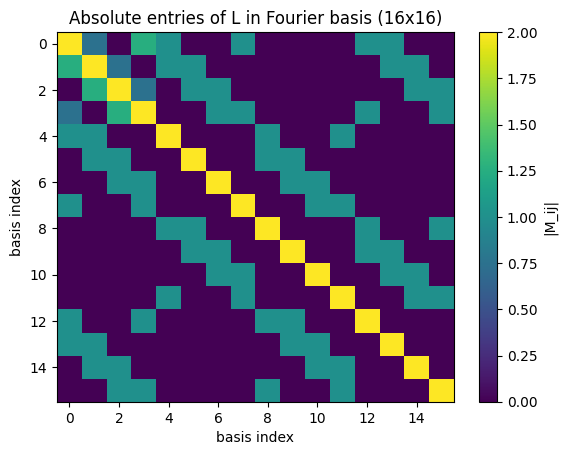

Max off-diagonal magnitude: 0.00e+00 (should be ~0)
Min diagonal magnitude:    1.00e+00 (should be ~1)


In [5]:
N = 4
varepsilon = 0.25
J = 1.0

L_q = hlp.quantum_liouvillian(N, varepsilon, J)
F_list = hlp.build_fourier_basis(N)
B = np.column_stack([hlp.vec(F) for F in F_list])

# Compute Gram matrix G = B^† B
G = B.conj().T @ B

# Compute overlap G = B^† B (should be diagonal but with wrong norms)
diag = np.diag(G)               # these are the ||vec(F_old)||^2
norms = np.sqrt(diag)          # their 2‑norms
B_normed = B / norms[np.newaxis, :]   # divide each column by its norm

# Change basis: M = B^{-1} L B
B_normed_inv = np.linalg.inv(B_normed)
M = B_normed_inv @ L_q @ B_normed

# Plot heatmap of |M| to show block structure
plt.imshow(np.abs(M), aspect='auto')
plt.colorbar(label='|M_ij|')
plt.title('Absolute entries of L in Fourier basis (16x16)')
plt.xlabel('basis index')
plt.ylabel('basis index')
plt.show()


# Check off-diagonal and diagonal entries
max_off = np.max(np.abs(G - np.diag(np.diag(G))))
min_on = np.min(np.abs(np.diag(G)))

print(f"Max off-diagonal magnitude: {max_off:.2e} (should be ~0)")
print(f"Min diagonal magnitude:    {min_on:.2e} (should be ~1)")

In [6]:

# flatten your old Fs
vecs = [hlp.vec(F) for F in F_list]
# do Gram–Schmidt in place
orth = []
for v in vecs:
    w = v.copy()
    for u in orth:
        w -= (u.conj().T @ v) * u
    if np.linalg.norm(w) > 1e-12:
        u = w / np.linalg.norm(w)
        orth.append(u)
# now orth is a list of 16 orthonormal vectors
B_gs = np.column_stack(orth)

# check
G_gs = B_gs.conj().T @ B_gs   # should be identity
print("max off diag:", np.max(np.abs(G_gs - np.diag(np.diag(G_gs)))))
print("diag:", np.diag(G_gs))

# transform
M = B_gs.conj().T @ L_q @ B_gs

max off diag: 0.0
diag: [1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j
 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j]


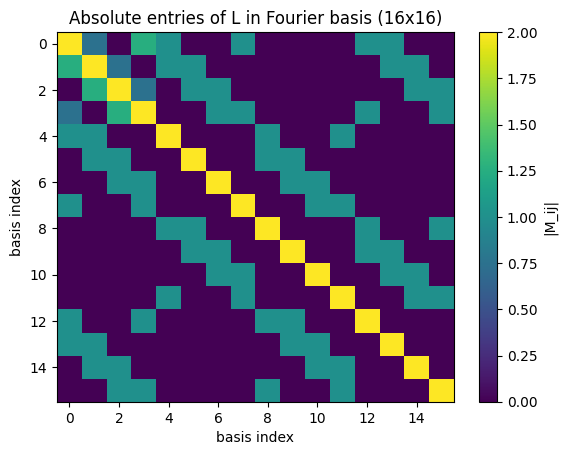

In [7]:

# Plot heatmap of |M| to show block structure
plt.imshow(np.abs(M), aspect='auto')
plt.colorbar(label='|M_ij|')
plt.title('Absolute entries of L in Fourier basis (16x16)')
plt.xlabel('basis index')
plt.ylabel('basis index')
plt.show()

In [3]:
fn.print_matrix(B.real)

1.0	.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	.  
.  	.  	.  	.  	1.0	.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	.  
.  	.  	.  	.  	.  	.  	.  	.  	1.0	.  	.  	.  	.  	.  	.  	.  
.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	1.0	.  	.  	.  
.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	1.0	.  	.  
.  	1.0	.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	.  
.  	.  	.  	.  	.  	1.0	.  	.  	.  	.  	.  	.  	.  	.  	.  	.  
.  	.  	.  	.  	.  	.  	.  	.  	.  	1.0	.  	.  	.  	.  	.  	.  
.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	1.0	.  	.  	.  	.  	.  
.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	1.0	.  
.  	.  	1.0	.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	.  
.  	.  	.  	.  	.  	.  	1.0	.  	.  	.  	.  	.  	.  	.  	.  	.  
.  	.  	.  	.  	.  	.  	.  	1.0	.  	.  	.  	.  	.  	.  	.  	.  
.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	1.0	.  	.  	.  	.  
.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	.  	1.0
.  	.  	.  	1.0	.  	.  	.  	.  	.  	.  	

In [4]:
# Extract block for a mu value
mu = 1
block = M[mu*N:(mu+1)*N, mu*N:(mu+1)*N]
# Create DataFrame for display
df_block = pd.DataFrame(np.round(block, 3),
                        index=[f'alpha={r}' for r in range(N)],
                        columns=[f'alpha\'={r}' for r in range(N)])

df_block

,alpha'=0,alpha'=1,alpha'=2,alpha'=3
alpha=0,-2.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
alpha=1,0.0+0.0j,-2.0+0.0j,0.0+0.0j,0.0+0.0j
alpha=2,0.0+0.0j,0.0+0.0j,-2.0+0.0j,0.0+0.0j
alpha=3,0.0+0.0j,0.0+0.0j,0.0+0.0j,-2.0+0.0j


In [ ]:
import numpy as np
import pandas as pd
from scipy.linalg import eig

# 1) Define Liouvillian and Fourier basis
def quantum_liouvillian(epsilon: float, J: float = 1.0, N=4):
    ops = [[np.zeros((N, N), complex) for _ in range(N)] for _ in range(N)]
    for i in range(N):
        for j in range(N):
            ops[i][j][i, j] = 1
    H = np.zeros((N, N), complex)
    for i in range(N):
        H[i, (i + 1) % N] = J
        H[(i + 1) % N, i] = J
    r_plus, r_minus = np.sqrt(1 + epsilon), np.sqrt(1 - epsilon)
    c_ops = [r_plus*ops[(i+1)%N][i] for i in range(N)] + [r_minus*ops[(i-1)%N][i] for i in range(N)]
    Id = np.eye(N, dtype=complex)
    L = -1j*(np.kron(Id, H) - np.kron(H.T, Id))
    for c in c_ops:
        cdc = c.conj().T @ c
        L += np.kron(c.conj(), c) - 0.5*np.kron(Id, cdc) - 0.5*np.kron(cdc.T, Id)
    return L

def build_fourier_basis(N=4):
    F_list = []
    for mu in range(N):
        for alpha in range(N):
            F = np.zeros((N, N), complex)
            for m in range(N):
                F[(m + alpha) % N, m] += np.exp(-2j * np.pi * mu * m / N)
            F /= N
            F_list.append(F)
    return F_list

# 2) Build L_q and change-of-basis B
N = 4
L_q = quantum_liouvillian(0.25, 1.0, N)
F_list = build_fourier_basis(N)
B = np.column_stack([F.reshape(N*N, order='F') for F in F_list])
B_inv = np.linalg.inv(B)
M = B_inv @ L_q @ B

# 3) Diagonalize each block M_mu of size 4x4
results = []
dic = {}
for mu in range(N):
    block = M[mu*N:(mu+1)*N, mu*N:(mu+1)*N]
    vals, vecs = eig(block)
    for k in range(N):
        coeffs = vecs[:, k]
        results.append({
            'μ': mu,
            'k': k,
            'eigenvalue': np.round(vals[k], 8),
            'coeffs': [np.round(c, 4) for c in coeffs]
        })
        
        if mu not in dic:
            dic[(mu,k)] = []
        dic[(mu,k)].append({
            'eigenvalue': np.round(vals[k], 8),
            'coeffs': [np.round(c, 4) for c in coeffs]
        })

# 4) Present in DataFrame
df = pd.DataFrame(results)
import ace_tools_open as tools; tools.display_dataframe_to_user("Eigen-decomposition per Z4 sector", df)


In [ ]:
# Block-diagonalize and test
max_resid = 0.0
resids = []
evecs_dic, evals_dic = {}, {}
for mu in range(4):
    # 1) extract the true similarity-transformed block
    M_mu = B_inv @ L_q @ B
    block = M_mu[mu*4:(mu+1)*4, mu*4:(mu+1)*4]

    # 2) diagonalize
    vals, vecs = eig(block)

    # 3) lift each eigenvector back to the full space and check
    for k in range(4):
        λ = vals[k]
        v = vecs[:, k]
        c = np.zeros(16, complex)
        c[mu*4:(mu+1)*4] = v
        ψ = B @ c
        resid = L_q @ ψ - λ * ψ
        evecs_dic[(mu, k)] = ψ
        evals_dic[(mu, k)] = λ
        resids.append({
            'mu': mu,
            'k': k,
            'λ': np.round(λ, 2),
            'residual_norm': np.linalg.norm(resid)
        })
        max_resid = max(max_resid, np.linalg.norm(resid))

print(f"Maximum residual norm: {max_resid:.2e}")
df_resids = pd.DataFrame(resids)
import ace_tools_open as tools; tools.display_dataframe_to_user("Residuals of eigenvalue equation", df_resids)


In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(12, 12))
abs_max = np.max([abs(v) for v in evecs_dic.values()])
abs_min = np.min([abs(v) for v in evecs_dic.values()])

for mu in range(4):
    for k in range(4):
        idx = mu * 4 + k
        ψ = evecs_dic[(mu, k)]
        λ = evals_dic[(mu, k)]
        d1 = np.ma.masked_less(np.abs(ψ.reshape(4, 4, order='F')), 1e-12)
        ax = axs[mu, k]
        ax.imshow(np.abs(ψ.reshape(4, 4, order='F')), cmap='viridis', vmin=abs_min, vmax=abs_max)
        ax.set_title(f"μ={mu}, k={k}\nλ={λ:.2f}")
        ax.axis('off')

In [ ]:
# Create global ordering 0..15 by descending real part
all_items = list(evals_dic.items())  # [((mu,k), lambda), ...]
# Sort by real part descending
sorted_all = sorted(all_items, key=lambda x: x[1].real, reverse=True)
ordering_global = {item[0]: rank+1 for rank, item in enumerate(sorted_all)}

ordering_global

In [ ]:
# Construct rho1, rho2
a, b = 0, 0
rho1 = evecs_dic[(0,0)] + (evecs_dic[(0,1)] + evecs_dic[(0,3)])/3 + evecs_dic[(2,2)]*(2/3)
rho2 = evecs_dic[(0,0)] + evecs_dic[(0,2)]/4 + (evecs_dic[(2,0)]+evecs_dic[(2,1)])*(1/4) + (evecs_dic[(1,0)]+evecs_dic[(3,0)])*(1/4)

rho1 = rho1.reshape(4, 4, order='F')
rho2 = rho2.reshape(4, 4, order='F')

fn.print_matrix(rho2)
# Hermitize and renormalize
assert np.allclose(rho1, rho1.conj().T), "rho1 must be Hermitian"
assert np.allclose(rho2, rho2.conj().T), "rho2 must be Hermitian"
assert np.isclose(np.trace(rho1), 1), "rho1 must be normalized (trace = 1), but trace = {}".format(np.trace(rho1))
assert np.isclose(np.trace(rho2), 1), "rho2 must be normalized (trace = 1), but trace = {}".format(np.trace(rho2))
assert np.all(np.linalg.eigvals(rho1) >= 0), "rho1 must be positive semidefinite, but eigenvalues are {}".format(np.linalg.eigvals(rho1))
assert np.all(np.linalg.eigvals(rho2) >= 0), "rho2 must be positive semidefinite, but eigenvalues are {}".format(np.linalg.eigvals(rho2))

print("\n\nAsymmetry S(rho1) =", asymmetry(rho1), "*"*90)
print("\nrho1 =")
fn.print_matrix(rho1)
print("\n\nAsymmetry S(rho2) =", asymmetry(rho2), "*"*90)
print("\nrho2 =")
fn.print_matrix(rho2)


In [ ]:
# Time evolution
t = np.linspace(0, 10, 100)
S1, S2 = np.zeros(len(t)), np.zeros(len(t))
modes1, modes2 = np.zeros((len(t), 4)), np.zeros((len(t), 4))
for t_idx, ti in enumerate(t):
    evo = expm(L_q * ti)
    r1_t = evo.dot(rho1.flatten('F')).reshape(4,4,order='F')
    r2_t = evo.dot(rho2.flatten('F')).reshape(4,4,order='F')
    modes1_t = mode_trace_norms(r1_t)
    modes2_t = mode_trace_norms(r2_t)
    modes1[t_idx,:] = modes1_t
    modes2[t_idx,:] = modes2_t
    S1[t_idx] = asymmetry(r1_t)
    S2[t_idx] = asymmetry(r2_t)

In [ ]:
%matplotlib osx

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
ax = axs[0]
ax.plot(t, S1, label=r'Asymmetry of $\hat\rho_1(t)$')
ax.plot(t, S2, label=r'Asymmetry of $\hat\rho_2(t)$')
ax.set_xlabel('Time t')
ax.set_ylabel('Quantum Asymmetry S')
ax.legend()
ax.set_title('Symmetry-Twirl Asymmetry vs Time')
ax.set_yscale('log')    

ax = axs[1]
for mu in range(1,4):
    if np.max(modes1[:, mu]) > 1e-12 :
        ax.plot(t, modes1[:, mu], label=f'Mode {mu} of ρ₁(t)', linestyle='--', alpha=0.7)
    if np.max(modes2[:, mu]) > 1e-12 :
        ax.plot(t, modes2[:, mu], label=f'Mode {mu} of ρ₂(t)', linestyle='-', alpha=0.7)
plt.xlabel('Time t')
plt.ylabel('trace norm of mode')
plt.legend()
plt.title('')
plt.tight_layout()
plt.yscale('log')
plt.show()
